In [1]:
import matplotlib.pyplot as plt
from sympy import *
import sympy as sp
import numpy as np

import sde
import rungekutta as RK
import PopulModel as pm
import IStoDE as de

In [2]:
# Настройка картинки matplotlib
plt.rcParams['figure.figsize'] = (12, 4)  # Изменение размера картинки
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 13
plt.rcParams['legend.framealpha'] = 0.5
plt.rcParams['font.family'] = ['serif']


In [3]:
### Модель хищник-жертва

model_1 = pm.PopModel(2)
model_1.adder(1,1,0,"a")
model_1.adder(4,1,2,"b")
model_1.adder(2,2,0,"c")

XX = sp.Matrix(['x', 'y'])

a=model_1.display_infos(model_1,XX)#,k_plus)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
k_plus=sp.Matrix(model_1.coef)
f = de.drift_vector(XX, k_plus, model_1.matr_N(), model_1.matr_M())

In [5]:
sp.Matrix(f)

Matrix([
[a*x - b*x*y],
[b*x*y - c*y]])

In [6]:
g=de.diffusion_matrix(XX, k_plus, model_1.matr_N(), model_1.matr_M())
g

Matrix([
[a*x + b*x*y,      -b*x*y],
[     -b*x*y, b*x*y + c*y]])

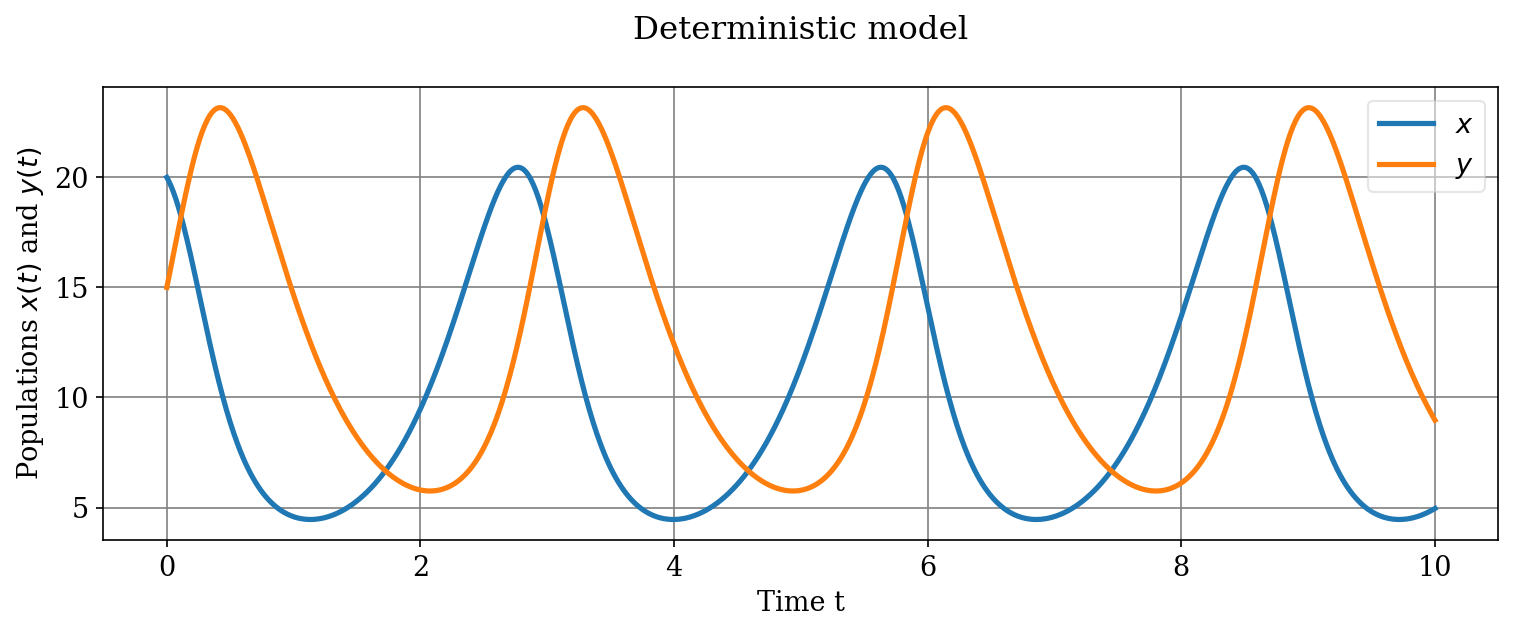

In [8]:
# численное решение ОДУ для модели хищник-жертва

F = de.func_for_rk(XX, k_plus, f)

# задаем значения параметров и начальные значения
p = (a, b, c)= [2.5,0.2,2.1]   
OO = [20,15]                 

rk = RK.RK(2)
td, x = rk.integrate(F, OO, (0.0, 10), h=0.01, func_params=p)

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)
title = "Deterministic model\n"
ax1.set_title(title)
ax1.set_xlabel("Time t")
ax1.set_ylabel("Populations $x(t)$ and $y(t)$")
ax1.plot(td, x[0],  label=u'$x$',  lw=2.5)
ax1.plot(td, x[1],  label=u'$y$', lw=2.5)
ax1.legend(ncol=1)
ax1.grid(True, color='grey')

In [9]:
AA=de.matr_A(XX, k_plus, p, f)
BB=de.matr_B(XX, k_plus, p, g)

In [10]:
# численное решение СДУ для модели хищник-жертва

time_interval = (0.0, 10.0)
h = 0.01
N = int((time_interval[1] - time_interval[0])/h)
sim_nums = np.arange(0,50,1)  

array_of_xss1 = np.empty((N,len(sim_nums)))
array_of_xss2 = np.empty((N,len(sim_nums)))

for sim_num in sim_nums:
    dt, t, dW, W = sde.wiener_process(N, dim=2, interval=time_interval)
    y = sde.EulerMaruyamaWm_NEW(AA, BB, h, OO, dW*0.01)
    array_of_xss1[:, sim_num] = y.T[0]
    array_of_xss2[:, sim_num] = y.T[1]


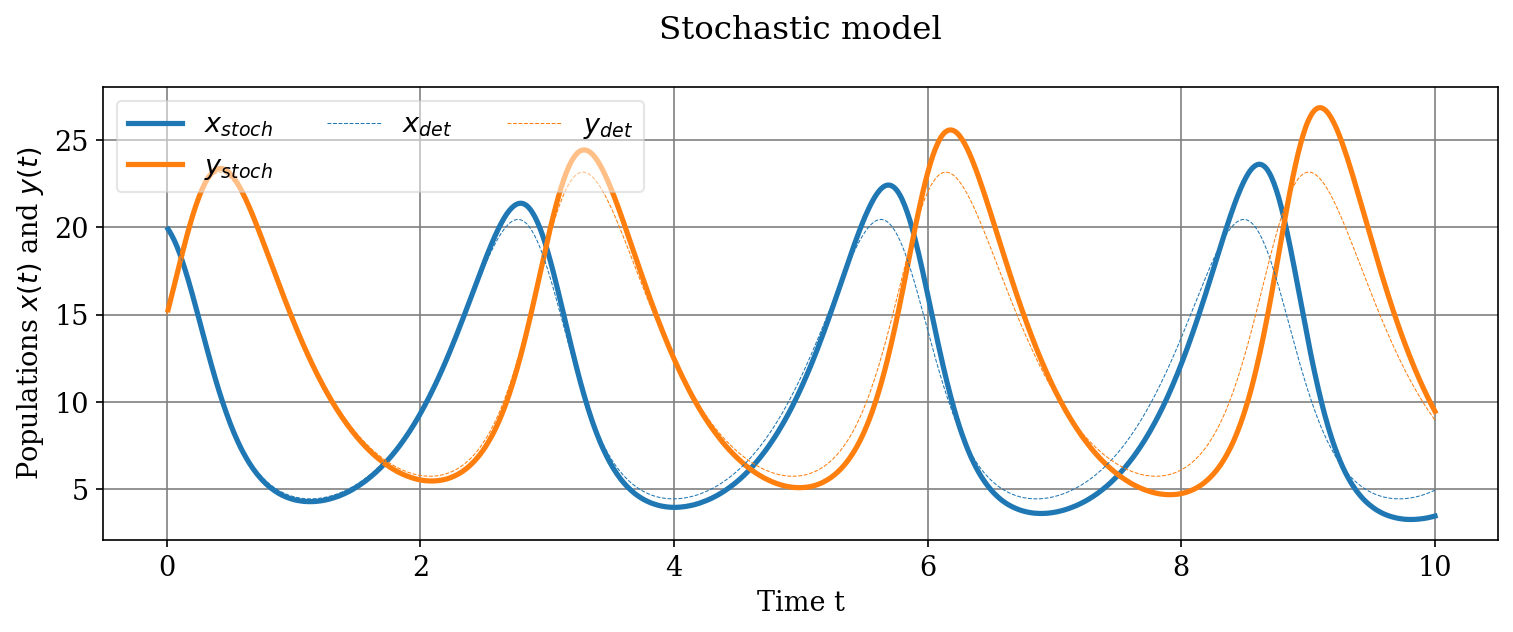

In [11]:
fig3 = plt.figure(3)
ax3 = fig3.add_subplot(1,1,1)

title = "Stochastic model\n"

ax3.set_title(title)
ax3.set_xlabel("Time t")
ax3.set_ylabel("Populations $x(t)$ and $y(t)$")

Ex1 = array_of_xss1.mean(axis=-1)
Ex2 = array_of_xss2.mean(axis=-1)

ax3.plot(t, Ex1,  label='$x_{stoch}$', lw=2.5)
ax3.plot(t, Ex2,  label='$y_{stoch}$', lw=2.5)

ax3.plot(td, x[0], color='#1f77b4', label=u'$x_{det}$',ls='--',   lw=0.5)
ax3.plot(td, x[1],  color='#ff7f0e' , label=u'$y_{det}$',ls='--', lw=0.5)

ax3.grid(True, color='grey')
ax3.legend(ncol=3)